<a href="https://colab.research.google.com/github/ASTROA-MAN/DATA_SCIENCE_PROJECTS/blob/main/Project7_Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE DEPENDENCIES**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

**DATA COLLECTION AND PROCESSING**

In [ ]:
# Loading The Data From csv File To pandas DataFrame
car_dataset = pd.read_csv('/content/car data.csv')

In [ ]:
# First 5 Rows Of The DataFrame
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [ ]:
# The Number Of Rows And Columns
car_dataset.shape

(301, 9)

In [ ]:
# Statistical Description Of The Dataset
car_dataset.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [ ]:
car_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [ ]:
# Checking The Missing Values
car_dataset.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
# Checking The Distribution Of Categorical Datas
print(car_dataset.Fuel_Type.value_counts())
print(car_dataset.Seller_Type.value_counts())
print(car_dataset.Transmission.value_counts())

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


**ENCODING THE CATEGORICAL DATA**

In [ ]:
car_dataset.replace({'Fuel_Type':{'Petrol':0, 'Diesel':1, 'CNG':2}, 'Seller_Type':{'Dealer':0, 'Individual':1}, 'Transmission':{'Manual':0, 'Automatic':1}}, inplace=True)

In [ ]:
car_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


**SPLITTING THE DATA AND THE TARGET**

In [ ]:
X = car_dataset.drop(['Car_Name', 'Selling_Price'], axis=1)
Y = car_dataset['Selling_Price']

In [ ]:
print(X)
print(Y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

**SPLITTING THE DATSET INTO TRAINING AND TEST DATASET**

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2) 

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(301, 7) (270, 7) (31, 7)


**MODEL TRAINING**

1. LINEAR REGRESSION

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

MODEL EVALUATION

In [ ]:
# Prediction On Training Data
training_data_prediction = lr.predict(X_train)

In [ ]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Error :', error_score)

R Squared Error : 0.8799451660493711


VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES

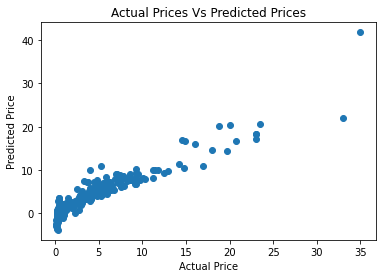

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

In [ ]:
# Prediction On Test Data
test_data_prediction = lr.predict(X_test)

In [ ]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Error :', error_score)

R Squared Error : 0.8365766715027051


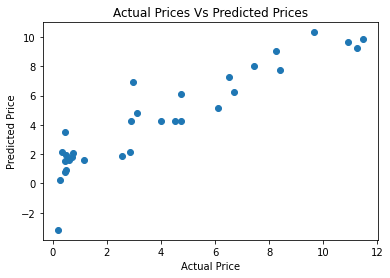

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

2. LASSO REGRESSION

In [ ]:
las_reg = Lasso()

In [ ]:
las_reg.fit(X_train, Y_train)

Lasso()

MODEL EVALUATION

In [ ]:
# Prediction On Training Data
training_data_prediction = las_reg.predict(X_train)

In [ ]:
# R Squared Error
error_score = metrics.r2_score(Y_train, training_data_prediction)
print('R Squared Error :', error_score)

R Squared Error : 0.8427856123435794


VISUALIZING THE ACTUAL PRICES AND PREDICTED PRICES

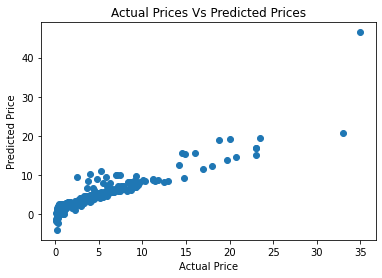

In [ ]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()

In [ ]:
# Prediction On Test Data
test_data_prediction = las_reg.predict(X_test)

In [ ]:
# R Squared Error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print('R Squared Error :', error_score)

R Squared Error : 0.8709167941173195


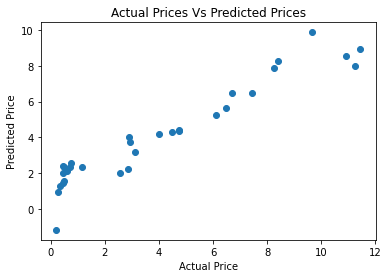

In [ ]:
plt.scatter(Y_test, test_data_prediction)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices Vs Predicted Prices')
plt.show()